## Week 4 Lab exercises

In this week we will continue to practise the use of classes, and the numerical solution of higher order non linear ordinary differential equations (ODEs). 

In [30]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 

I have written a class below for integrating equations that implements the Euler method. Update it to include the midpoint method and (OPTIONALLY) a 4th order Runge-Kutta method (from scratch, not just by including solve_ivp()!). Be sure to add in asserts to sense check what the class is doing.

/var/folders/34/d97grh111731x7mh7g0tzz7w0000gn/T/ipykernel_29806/894154086.py:89: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0


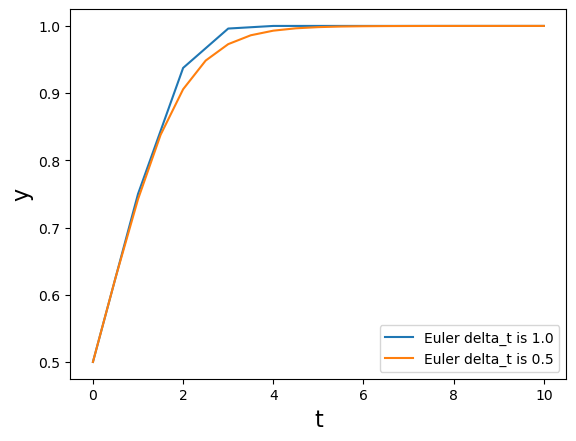

In [21]:
# ExplicitIntegrator class

class ExplicitIntegrator :

    """
    Contains explicit methods to integrate ODEs
    
    attributes: the function to calculate the gradient dydt, max_time, 
                N_time_steps, method
                
    methods: calculate_solution, plot_solution
    
    """
    integration_methods = ["Euler", "MidPoint", "RK4"]
    
    # constructor function
    def __init__(self, dydt, max_time=0, N_time_steps=0, method = "Euler"):
        
        self.dydt = dydt # Note that we are passing in a function, this is ok in python
        self.method = method
        assert self.method in self.integration_methods, 'chosen integration method not implemented'
        
        # Make these private - restrict getting and setting as below
        self._max_time = max_time
        self._N_time_steps = N_time_steps
        
        # Derived from the values above
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, max_time, N_time_steps+1) # create an array of evenly spaced values 
                                                                      # starting from 0 and ending at max_time with N_time_steps+1 points
        self._y_solution = np.zeros_like(self._t_solution) # an array of zeros with the same shape at _t_solution

    # Enables the user to get the t solution
    @property
    def y_solution(self):
        return self._y_solution

    # Enables the user to get the y solution
    @property
    def t_solution(self):
        return self._t_solution
    
    @property
    def max_time(self):
        return self._max_time

    @property
    def N_time_steps(self):
        return self._N_time_steps
    
    # Enables the user to reset the max time
    @max_time.setter
    def max_time(self, value):
        self._max_time = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)
        
    # Enables the user to reset the number of time steps
    @N_time_steps.setter
    def N_time_steps(self, value):
        self._N_time_steps = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    def calculate_solution(self, y0) :
        if (self.method == "Euler") :
            self.integrate_using_Euler(self.dydt, y0)
        elif (self.method == "MidPoint") :
            self.integrate_using_midpoint(self.dydt, y0)
        elif (self.method == "RK4") :
            self.integrate_using_RK4(self.dydt, y0)
        else :
            assert False, 'integration method not implemented'
            
    def plot_solution(self) :
        
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16) 
        plt.plot(self._t_solution, self._y_solution, '-', 
                 label=self.method + " delta_t is " + str(self._delta_t))
        plt.legend()

    def integrate_using_Euler(self, dydt_function, y0) :
        
        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0
            else :
                dydt_at_t = self.dydt(self.t_solution[itime-1], self._y_solution[itime-1]) # t_solution[itime-1] instead of old_time in solution
                self._y_solution[itime] = (self._y_solution[itime-1] + dydt_at_t * self._delta_t) # Definition of Euler's method

    
    #UPDATE ME!
    #def integrate_using_midpoint(dydt_function, y0) :
    def integrate_using_midpoint(self, dydt_function, y0) :
        for itime, time in enumerate(self.t_solution) : # recall: self._t_solution = np.linspace(0.0, max_time, N_time_steps+1)
            if itime == 0 :
                self._y_solution[itime] = y0
                #old_time = time
            else :
                dydt_at_t = self.dydt(self.t_solution[itime-1], self._y_solution[itime-1]) # compute the derivative (gradient) at the previous step 
                
                y_t_plus_half = (self._y_solution[itime-1] + 0.5 * dydt_at_t * self._delta_t) 
                # Estimates the value of y at the midpoint of the time interval, using the slope (dydt_at_t) from the previous step
                
                t_plus_half = old_time + 0.5*self._delta_t # The time at the midpoint, which is half a time step (Δt/2) 
                                                           # after the previous time step
                
                dydt_at_t_plus_half = self.dydt(t_plus_half, y_t_plus_half) # compute the derivative at the midpoint 
                                                                            # using the dydt function and the midpoint values of y and t
                
                self._y_solution[itime] = (self._y_solution[itime-1] + dydt_at_t_plus_half * self._delta_t) # Definition of midpoint method
                # the new value of y at the next time step is calculated using the slope at the midpoint
                #old_time = time

    #UPDATE ME (OPTIONALLY)
    #def integrate_using_RK4(dydt_function, y0) :
    def integrate_using_RK4(self, dydt_function, y0_initial) :
        h = self._delta_t
        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0_initial
            else : 
                y0 = self._y_solution[itime-1]
                k1 = self.dydt(self.t_solution[itime-1], y0)
                y1 = y0 + 0.5*h*k1
                k2 = self.dydt(self.t_solution[itime-1]+0.5*h, y1)
                y2 = y0 + 0.5*h*k2
                k3 = self.dydt(self.t_solution[itime-1]+0.5*h, y2)
                y3 = y0 + h*k3
                k4 = self.dydt(self.t_solution[itime-1]+h, y3)
                self._y_solution[itime] = y0 + h/6.0 * (k1 + 2.0*k2 + 2.0*k3 + k4)

    
# How to use the class - example for the logistic equation

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dy/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 10

# Define an object of the class
logistic_integrator = ExplicitIntegrator(calculate_logistic_dydt, max_time, 
                                         N_time_steps, "Euler")

# Find and plot the solution
y0 = np.array([0.5])
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution() # Recall: self._delta_t = self.max_time / self.N_time_steps = 10/10 = 1
#print(logistic_integrator.y_solution)

#Update the number of steps and plot again
logistic_integrator.N_time_steps = 20 # Note how this changes the other attributes above
                                      # Recall: self._delta_t = self.max_time / self.N_time_steps = 10/20 = 0.5
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
#print(logistic_integrator.y_solution)

### ACTIVITY 2:
    
Test the above integrator class on one of the simple differential equations that we have studied so far, and confirm that the convergence orders you obtain when doubling the resolution for each method are as expected.

/var/folders/34/d97grh111731x7mh7g0tzz7w0000gn/T/ipykernel_29806/1710187847.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0


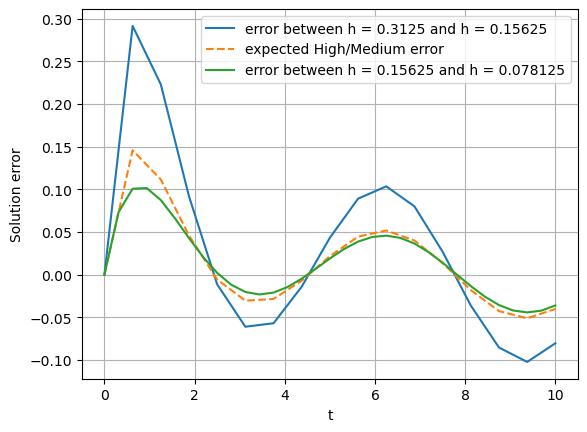

In [36]:
# Test the integrator

# UPDATE ME!

# Test the integrator for the Euler method - error should decrease 
# by factor of 2 as t is first order

order = 2.0 ** 1.0
logistic_integrator = ExplicitIntegrator(calculate_dydt, max_time, 
                                         N_time_steps, "Euler")
y0 = np.array([2.0])
N_steps_vector = [16,32,64]
for isteps, N_steps in enumerate(N_steps_vector) :

    logistic_integrator.N_time_steps = N_steps
    logistic_integrator.calculate_solution(y0)
    if isteps > 0 :
        # Need to take every other entry for the finer resolution so the
        # size of the vectors match
        diff = logistic_integrator.y_solution[::2] - old_solution
        h = logistic_integrator.delta_t
        plt.plot(logistic_integrator.t_solution[::2], diff, 
                 label="error between h = " + str(h) + " and h = " + str(h/2))
        
        if isteps == 1 :
            plt.plot(logistic_integrator.t_solution[::2], diff / order, '--', label="expected High/Medium error" )
    old_solution = logistic_integrator.y_solution
plt.grid()
plt.legend()
plt.ylabel("Solution error")
plt.xlabel("t");

/var/folders/34/d97grh111731x7mh7g0tzz7w0000gn/T/ipykernel_29806/1710187847.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0


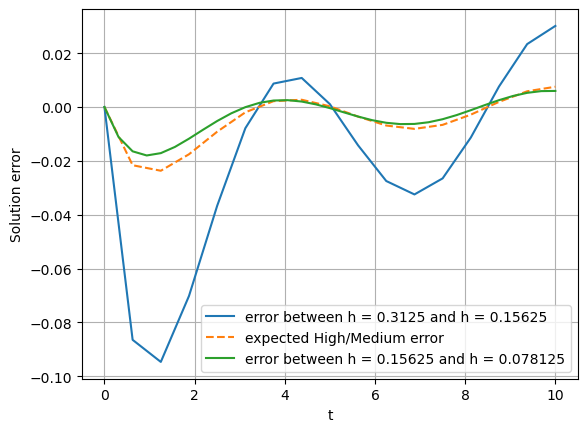

In [34]:
# Test the integrator for the midpoint method - error should decrease 
# by factor of 4 as it is second order
order = 2.0 ** 2.0
logistic_integrator = ExplicitIntegrator(calculate_dydt, max_time, 
                                         N_time_steps, "MidPoint")
y0 = np.array([2.0])
N_steps_vector = [16,32,64]
for isteps, N_steps in enumerate(N_steps_vector) :

    logistic_integrator.N_time_steps = N_steps
    logistic_integrator.calculate_solution(y0)
    h = logistic_integrator.delta_t
    if isteps > 0 :
        # Need to take every other entry for the finer resolution so the
        # size of the vectors match
        diff = logistic_integrator.y_solution[::2] - old_solution
        plt.plot(logistic_integrator.t_solution[::2], diff,
                 label="error between h = " + str(h) + " and h = " + str(h/2))  
        if isteps == 1 :
            plt.plot(logistic_integrator.t_solution[::2], diff / order, '--', 
                     label="expected High/Medium error" )
    old_solution = logistic_integrator.y_solution
plt.grid()
plt.legend()
plt.ylabel("Solution error")
plt.xlabel("t");

/var/folders/34/d97grh111731x7mh7g0tzz7w0000gn/T/ipykernel_29806/1710187847.py:128: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0_initial


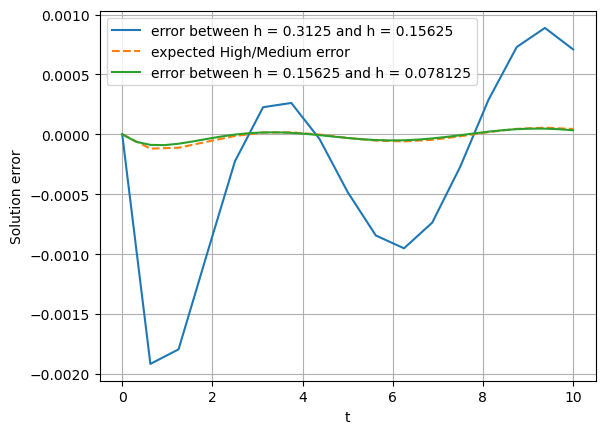

In [35]:
# Test the integrator for the RK4 method - error should decrease 
# by factor of 16 as it is 4th order
order = 2.0 ** 4.0
logistic_integrator = ExplicitIntegrator(calculate_dydt, max_time, 
                                         N_time_steps, "RK4")
y0 = np.array([2.0])
N_steps_vector = [16,32,64]
for isteps, N_steps in enumerate(N_steps_vector) :

    logistic_integrator.N_time_steps = N_steps
    logistic_integrator.calculate_solution(y0)
    h = logistic_integrator.delta_t
    if isteps > 0 :
        # Need to take every other entry for the finer resolution so the
        # size of the vectors match
        diff = logistic_integrator.y_solution[::2] - old_solution
        plt.plot(logistic_integrator.t_solution[::2], diff,
                 label="error between h = " + str(h) + " and h = " + str(h/2))  
        if isteps == 1 :
            plt.plot(logistic_integrator.t_solution[::2], diff / order, '--', 
                     label="expected High/Medium error" )
    old_solution = logistic_integrator.y_solution
plt.grid()
plt.legend()
plt.ylabel("Solution error")
plt.xlabel("t");

### ACTIVITY 3:

Write a class that contains information about the Van der Pol oscillator with a source, and solves the second order ODE related to its motion using scipy's solve_IVP method:

$\frac{d^2y}{dt^2} - 2a (1-y^2) \frac{dy}{dt} + y = f(t)$

where $a$ is a damping factor. Your class should allow you to pass in the source function f(t) as an argument that can be changed. 

_HINT: It may help to start with the Ecosystem class in the solutions for last week's tutorial and modify this._

What parts or features of the differential equation tell us if it is:

1. Second or first order
2. Autonomous
3. Linear / non linear
4. Dimension 1 or 2?

In [40]:
from scipy.integrate import solve_ivp

class VanDerPolOscillator:
    
    """Definition: Class about the Van der Pol oscillator non linear dumped oscillator
    
       attributes: damping factor a, forcing function f_of_t, 
       lifetime of oscillations, plus private attributes for the solutions
       
       methods:
    
    """
    def __init__(self, f_of_t, a=0.0, lifetime = 1.0):
        self.a = a
        assert a >= 0.0, "Damping factor should be non-negative."
        self.f_of_t = f_of_t
        self.lifetime = lifetime
        self._solution_y = []
        self._solution_t = []
        self._solution_v = [] # since i will decompose the 2nd order equation into 2

    def integrate_VDP_oscillator(self, initial_value, N_time_steps=100) :
        delta_t = self.lifetime / N_time_steps
        t_solution = np.linspace(0.0, self.lifetime, N_time_steps+1)
        solution = solve_ivp(self.calculate_VDP_dydt, [0,self.lifetime], initial_value, t_eval=t_solution)
        self._solution_t = solution.t
        self._solution_y = solution.y[0]
        self._solution_v = solution.y[1]
        elf._solution_solved = True

    def calculate_VDP_dydt(self, t,y) :
        y_t = y[0]
        v_t = y[1]
        dydt = np.zeros_like(y)
        dydt[0] = v_t
        dydt[1] = self.f_of_t(t) + 2.0*self.a*(1-y_t**2)*v_t - y_t 
        return dydt

    def plot_solution(self) : 
        assert self._solution_solved, "solution has not yet been found"

        plt.grid()
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.plot(self._solution_t, self._solution_y, 'g-', label = "solve for y")
        plt.plot(self._solution_t, self._solution_v, 'r-', label = "solve for v")
        plt.legend()

    def plot_phase_plot(self) :
        
        assert self._solution_t.size != 0, "solution has not yet been found"
        
        plt.grid()
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16) 
        plt.plot(self._solution_y, self._solution_v)  

### ACTIVITY 4

Initially set $f(t) = 0$. 

Add a method to make a phase plot $(y, dy/dt)$ of the solutions for a range of initial conditions. What do you observe about the behaviour?

In [5]:
# Phase plot

# UPDATE ME!

### ACTIVITY 5

Now set $f(t) = \sin(\omega t)$. For what values of $\omega$ do the methods start to fail? Why?

In [6]:
# UPDATE ME!